<a href="https://colab.research.google.com/github/eliudgarza/eliudgarza/blob/main/Implementaci%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Eliud Garza A00827575




In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

!pwd

Mounted at /content/gdrive
/content


In [4]:
%cd "/content/gdrive/MyDrive/7mo Semestre/Modulo 2/Titanic"

!ls

/content/gdrive/MyDrive/7mo Semestre/Modulo 2/Titanic
X_test.txt  X_train.txt  Y_test.txt  Y_train.txt


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
x_tn = pd.read_csv("X_train.txt")
y_tn = pd.read_csv("Y_train.txt")

x_tt = pd.read_csv("X_test.txt")
y_tt = pd.read_csv("Y_test.txt")

In [7]:
x_tn.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [8]:
y_tn.head()

,Id,Survived
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0


In [9]:
x_tt.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,1
2,2,2,0,62.0,0,0,9.6875,2
3,3,3,0,27.0,0,0,8.6625,1
4,4,3,1,22.0,1,1,12.2875,1


In [10]:
y_tt.head()

,Id,Survived
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1


In [11]:
x_tn = x_tn.drop("Id", axis = 1)
y_tn = y_tn.drop("Id", axis = 1)
x_tt = x_tt.drop("Id", axis = 1)
y_tt = y_tt.drop("Id", axis = 1)

In [12]:
x_tn = x_tn.values
y_tn = y_tn.values
x_tt = x_tt.values
y_tt = y_tt.values

In [13]:
x_tn = x_tn.T
y_tn = y_tn.reshape(1,x_tn.shape[1])
x_tt = x_tt.T
y_tt = y_tt.reshape(1,x_tt.shape[1])

In [14]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [41]:
def model(X, Y, learning_rate, iterations):
    x0 = x_tn.shape[1]
    x1 = x_tn.shape[0]
    P = np.zeros((x1,1))
    O = 0
    cost_list = []
    for i in range(iterations):
        Q = np.dot(P.T, X) + O
        R = sigmoid(Q)
        cost = -(1/x0)*np.sum( Y*np.log(R) + (1-Y)*np.log(1-R)) # cost function
        # Gradient Descent
        dP = (1/x0)*np.dot(R-Y, X.T)
        dO = (1/x0)*np.sum(R - Y)
        P = P - learning_rate*dP.T
        O = O - learning_rate*dO
        # Keeping track of our cost function value
        cost_list.append(cost)
        if(i%(iterations/10) == 0):
            print("iterations: ", i, "cost: ", cost)
    return P, O, cost_list

In [42]:
iterations = 100000
learning_rate = 0.0015
P, O, cost_list = model(x_tn, y_tn, learning_rate = learning_rate, iterations = iterations)

iterations:  0 cost:  0.6931471805599454
iterations:  10000 cost:  0.49652777693895306
iterations:  20000 cost:  0.46674868550666
iterations:  30000 cost:  0.45687787762434423
iterations:  40000 cost:  0.45288994293089646
iterations:  50000 cost:  0.4509326025222643
iterations:  60000 cost:  0.4497708749009468
iterations:  70000 cost:  0.4489640829216279
iterations:  80000 cost:  0.44834126966124827
iterations:  90000 cost:  0.44783045246935776


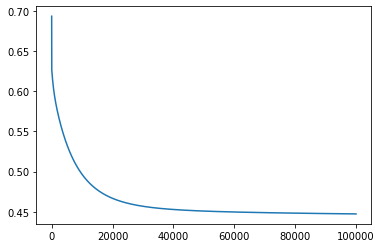

In [43]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [44]:
def accuracy(X, Y, P, O):
    Q = np.dot(P.T, X) + O
    R = sigmoid(Q)
    R = R > 0.5
    R = np.array(R, dtype = 'int64')
    acc = (1 - np.sum(np.absolute(R - Y))/Y.shape[1])*100
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [45]:
accuracy(x_tt, y_tt, P, O)

Accuracy of the model is :  91.39 %
